# Forecasting Property Investment Hotspots

**Authored by: Aneesh Pedram**

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

## Scenario

The City of Melbourne faces challenges in identifying suburbs with high property investment potential due to fluctuating house prices and varying population growth rates. This makes it difficult for investors and policymakers to make informed decisions about resource allocation and urban development. 

To address this, I propose an analysis that combines historical house price trends and population forecasts to identify investment hotspots. The insights will assist in optimizing urban planning, guiding investment strategies, and fostering sustainable growth in the city.

### User Story
**As** a property investor or urban planner,  
**I want** to use an analysis that identifies suburbs with high property investment potential based on historical house price trends and population growth forecasts,  
**so that** I can make informed decisions about resource allocation, urban development, and investment strategies.

**What the use case will teach you**

At the end of this use case you will:
- Demonstrate the ability to retrieve and process data from public APIs.
- Apply data cleaning and preprocessing techniques on property and population datasets.
- Perform basic aggregation and filtering methods to analyse trends.
- Calculate growth metrics such as CAGR and population growth percentages.
- Implement data visualisation techniques to identify investment hotspots.

## Introduction

Understanding property investment trends is crucial for urban development, resource allocation, and guiding investors towards high-potential areas. The City of Melbourne collects extensive data on house prices and population forecasts, which, when analysed together, can reveal valuable insights into investment opportunities.

This project focuses on developing an analysis that combines these datasets to identify suburbs with high property investment potential. By leveraging historical trends and growth forecasts, stakeholders can make informed decisions to optimise urban planning, foster sustainable growth, and maximise returns on investment. This approach supports smarter, data-driven strategies for urban development and investment planning.

***Dataset Links***
- House Prices Dataset: [House Prices by Small Area Sale Year](https://data.melbourne.vic.gov.au/explore/dataset/house-prices-by-small-area-sale-year/api/)
- Population Forecast Dataset: [City of Melbourne Population Forecasts](https://data.melbourne.vic.gov.au/explore/dataset/city-of-melbourne-population-forecasts-by-small-area-2020-2040/api/)

In [55]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

# Function to collect data via the export endpoint
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'

    params = {
        'select': '*',
        'limit': -1,   # fetch all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        csv_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(csv_content), delimiter=';')
        return dataset
    else:
        raise Exception(f"Request failed with status code {response.status_code} for {dataset_id}")

# Fetch House Prices Dataset
house_prices_id = 'house-prices-by-small-area-sale-year'
prices = collect_data(house_prices_id)
print(f"House Prices Dataset contains {len(prices)} records.")
print(prices.head(3))

# Fetch Population Forecast Dataset
population_id = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
pop = collect_data(population_id)
print(f"Population Forecast Dataset contains {len(pop)} records.")
print(pop.head(3))


House Prices Dataset contains 347 records.
   sale_year       small_area             type  median_price  \
0       2000        Parkville  House/Townhouse      516000.0   
1       2001          Carlton  House/Townhouse      381000.0   
2       2001  Melbourne (CBD)  House/Townhouse           NaN   

   transaction_count  
0                 42  
1                113  
2                  4  
Population Forecast Dataset contains 10584 records.
  geography  year  gender        age  value
0   Carlton  2023  Female  Age 65-69    224
1   Carlton  2023  Female    Age 85+     66
2   Carlton  2024  Female  Age 25-29   2105
Population Forecast Dataset contains 10584 records.
  geography  year  gender        age  value
0   Carlton  2023  Female  Age 65-69    224
1   Carlton  2023  Female    Age 85+     66
2   Carlton  2024  Female  Age 25-29   2105


## Data Collection

This code block defines a function `collect_data` to fetch datasets from the City of Melbourne's open data API. The function:
- Constructs the API endpoint URL dynamically using the dataset ID.
- Sends a GET request to the API with parameters to fetch all records in CSV format.
- Decodes the response content and loads it into a Pandas DataFrame for further analysis.

The datasets fetched include:
1. House Prices Dataset: Provides historical house price trends by small area.
2. Population Forecast Dataset: Contains population forecasts for small areas from 2020 to 2040.

This step ensures that the data is retrieved programmatically, making the process reproducible and scalable.

In [56]:
# Capitalize column names for both datasets
prices.columns = ['_'.join([word.capitalize() for word in col.split('_')]) for col in prices.columns]
pop.columns = ['_'.join([word.capitalize() for word in col.split('_')]) for col in pop.columns]

## Column Capitalisation

This code block standardises column names for both datasets by:
- Splitting column names on underscores (`_`).
- Capitalising each word in the column name.
- Joining the words back with underscores.

This ensures consistency in column naming, making the datasets easier to work with and improving readability in subsequent analysis steps.

In [57]:
prices.head() 

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Parkville,House/Townhouse,516000.0,42
1,2001,Carlton,House/Townhouse,381000.0,113
2,2001,Melbourne (CBD),House/Townhouse,NaN,4
3,2001,North Melbourne,Residential Apartment,270000.0,271
4,2001,South Yarra,House/Townhouse,800000.0,46


In [58]:
pop.head()

,Geography,Year,Gender,Age,Value
0,Carlton,2023,Female,Age 65-69,224
1,Carlton,2023,Female,Age 85+,66
2,Carlton,2024,Female,Age 25-29,2105
3,Carlton,2024,Female,Age 30-34,1174
4,Carlton,2024,Male,Age 25-29,1978


## Data Cleaning
- Check and clean column names.
- Handle missing values in `Small_Area` and `Median_Price`.
- Convert columns to appropriate data types.

In [59]:
# Check missing values in both datasets
print("Missing values in House Prices dataset:")
print(prices.isnull().sum())

print("Missing values in Population Forecast dataset:")
print(pop.isnull().sum())

Missing values in House Prices dataset:
Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64
Missing values in Population Forecast dataset:
Geography    0
Year         0
Gender       0
Age          0
Value        0
dtype: int64


## Handling Missing Values

This code block checks for missing values in both datasets:
- Uses the `isnull()` method to identify missing values in each column.
- Summarises the count of missing values per column using `sum()`.

This step helps identify data quality issues early, ensuring that appropriate cleaning steps can be applied to handle missing data effectively.

In [60]:
# Clean population dataset
pop.rename(columns={pop.columns[0]: 'Small_Area'}, inplace=True)

# Drop rows where Small_Area is missing
prices = prices.dropna(subset=['Small_Area'])

# Fill missing Median_Price with median price for that Small_Area
prices['Median_Price'] = prices.groupby('Small_Area')['Median_Price'].transform(lambda x: x.fillna(x.median()))

prices['Sale_Year'] = prices['Sale_Year'].astype(int)
prices.head(10)

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Parkville,House/Townhouse,516000.0,42
1,2001,Carlton,House/Townhouse,381000.0,113
2,2001,Melbourne (CBD),House/Townhouse,364000.0,4
3,2001,North Melbourne,Residential Apartment,270000.0,271
4,2001,South Yarra,House/Townhouse,800000.0,46
5,2002,West Melbourne (Residential),Residential Apartment,335000.0,104
6,2003,Kensington,Residential Apartment,0.0,288
7,2003,West Melbourne (Residential),House/Townhouse,375000.0,72
8,2004,Docklands,Residential Apartment,445000.0,252
9,2005,Melbourne (CBD),Residential Apartment,317500.0,1119


## Data Cleaning and Transformation

This code block performs the following cleaning and transformation steps:
1. Renames the first column in the population dataset to `Small_Area` for consistency.
2. Drops rows in the house prices dataset where `Small_Area` is missing, as these rows cannot be analysed.
3. Fills missing values in the `Median_Price` column with the median price for the corresponding `Small_Area` to preserve data integrity.
4. Converts the `Sale_Year` column to an integer type for accurate numerical operations.

These steps ensure that the datasets are clean, consistent, and ready for analysis.

## Exploratory Data Analysis (EDA)

,Sale_Year,Median_Price,Transaction_Count
count,340.000000,3.400000e+02,340.000000
mean,2008.170588,6.419830e+05,282.352941
std,4.879705,8.584610e+05,483.899163
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.640000e+05,48.750000
50%,2008.000000,4.805000e+05,122.000000
75%,2012.000000,6.470000e+05,225.250000
max,2016.000000,1.430000e+07,3766.000000


,Sale_Year,Median_Price,Transaction_Count
count,340.000000,3.400000e+02,340.000000
mean,2008.170588,6.419830e+05,282.352941
std,4.879705,8.584610e+05,483.899163
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.640000e+05,48.750000
50%,2008.000000,4.805000e+05,122.000000
75%,2012.000000,6.470000e+05,225.250000
max,2016.000000,1.430000e+07,3766.000000


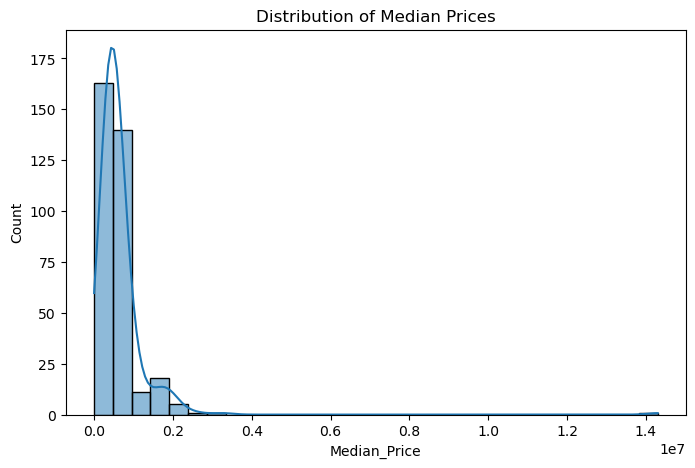

,Sale_Year,Median_Price,Transaction_Count
count,340.000000,3.400000e+02,340.000000
mean,2008.170588,6.419830e+05,282.352941
std,4.879705,8.584610e+05,483.899163
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.640000e+05,48.750000
50%,2008.000000,4.805000e+05,122.000000
75%,2012.000000,6.470000e+05,225.250000
max,2016.000000,1.430000e+07,3766.000000


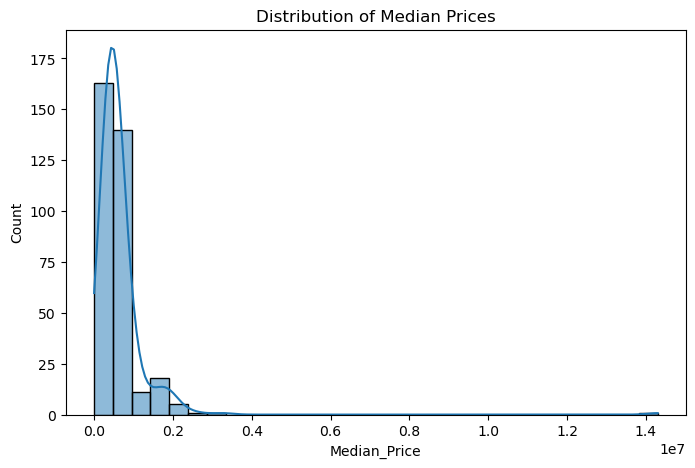

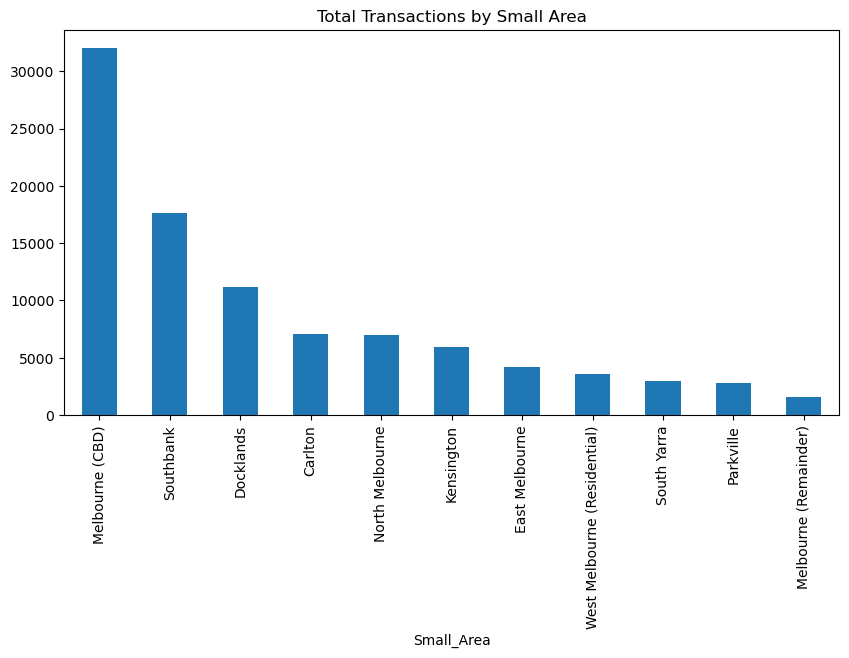

In [61]:
# Summary statistics
display(prices.describe())

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(prices['Median_Price'], bins=30, kde=True)
plt.title('Distribution of Median Prices')
plt.show()

# Transactions per Small_Area
plt.figure(figsize=(10,5))
prices.groupby('Small_Area')['Transaction_Count'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Transactions by Small Area')
plt.show()

In [62]:
import numpy as np

# Output all unique Small_Area values in both datasets
unique_values_prices = prices['Small_Area'].unique()
unique_values_pop = pop['Small_Area'].unique()

print("Unique Small_Area values in House Prices dataset:")
print(unique_values_prices)

print("\nUnique Small_Area values in Population Forecast dataset:")
print(unique_values_pop)

# Output common Small_Area values in both datasets as a numpy array
common_values = np.array(list(set(unique_values_prices).intersection(set(unique_values_pop))))
print("\nCommon Small_Area values in both datasets (on which we can perform feasible analysis):")
print(common_values)

Unique Small_Area values in House Prices dataset:
['Parkville' 'Carlton' 'Melbourne (CBD)' 'North Melbourne' 'South Yarra'
 'West Melbourne (Residential)' 'Kensington' 'Docklands' 'Southbank'
 'East Melbourne' 'Melbourne (Remainder)']

Unique Small_Area values in Population Forecast dataset:
['Carlton' 'Docklands' 'East Melbourne' 'Kensington' 'Melbourne (CBD)'
 'Melbourne (Remainder)' 'North Melbourne' 'Parkville' 'Port Melbourne'
 'South Yarra' 'Southbank' 'West Melbourne (Industrial)'
 'West Melbourne (Residential)' 'City of Melbourne']

Common Small_Area values in both datasets (on which we can perform feasible analysis):
['West Melbourne (Residential)' 'Kensington' 'North Melbourne' 'Docklands'
 'Parkville' 'Melbourne (Remainder)' 'South Yarra' 'Melbourne (CBD)'
 'East Melbourne' 'Carlton' 'Southbank']


## Exploratory Data Analysis (EDA)

This code block performs EDA to understand the house prices dataset:
1. Displays summary statistics for numerical columns using `describe()` to identify key metrics like mean, median, and range.
2. Plots the distribution of `Median_Price` using a histogram with a kernel density estimate (KDE) to visualise price trends.
3. Creates a bar chart showing the total number of transactions per `Small_Area` to identify areas with high activity.

Additionally, we identified the number of common `Small_Area` values between the house prices and population forecast datasets. These common areas represent the subset of data where analysis can be performed, as uncommon `Small_Area` values lack complete data across both datasets. Focusing on the common `Small_Area` ensures the integrity and reliability of the analysis.

## Insights from Exploratory Data Analysis (EDA)

The exploratory data analysis revealed the following key insights:

1. **Median Price Distribution**:
   - The histogram of median prices shows a right-skewed distribution, indicating that most properties are priced below the average, with a few high-value outliers.
   - This insight is crucial for understanding the overall affordability and identifying high-value areas.

2. **Transaction Activity by Small Area**:
   - The bar chart highlights areas with the highest transaction counts, which could indicate high demand or market activity.
   - These areas are potential hotspots for investment due to their active property markets.

3. **Common Small Areas**:
   - We identified 11 common `Small_Area` values between the house prices and population forecast datasets. These 11 areas will be the focus of our analysis, as uncommon `Small_Area` values lack complete data across both datasets.

These insights provide a foundational understanding of the dataset, helping to identify trends and anomalies that will guide further analysis.

In [63]:
# Drop uncommon Small_Area values from the population forecast data
common_small_areas = set(prices['Small_Area']).intersection(set(pop['Small_Area']))
pop = pop[pop['Small_Area'].isin(common_small_areas)]

# Verify the filtered population data
print(f"Filtered Population Forecast Dataset contains {len(pop)} records.")
print(pop.head())

# Print all unique Small_Area values in the dataframe
print("Unique Small_Area values in the filtered Population Forecast dataset:")
print(pop['Small_Area'].unique())

Filtered Population Forecast Dataset contains 8316 records.
  Small_Area  Year  Gender        Age  Value
0    Carlton  2023  Female  Age 65-69    224
1    Carlton  2023  Female    Age 85+     66
2    Carlton  2024  Female  Age 25-29   2105
3    Carlton  2024  Female  Age 30-34   1174
4    Carlton  2024    Male  Age 25-29   1978
Unique Small_Area values in the filtered Population Forecast dataset:
['Carlton' 'Docklands' 'East Melbourne' 'Kensington' 'Melbourne (CBD)'
 'Melbourne (Remainder)' 'North Melbourne' 'Parkville' 'South Yarra'
 'Southbank' 'West Melbourne (Residential)']


### Data Filtering Step
We have dropped all uncommon `Small_Area` values from the population forecast dataset to ensure consistency and reliability in the analysis. This step ensures that only areas with data available in both datasets are considered for further analysis.

## Population Growth Analysis

In [64]:
baseline_year, future_year = 2023, 2043
pop_agg = pop.groupby(['Small_Area', 'Year'])['Value'].sum().reset_index()
base_pop = pop_agg[pop_agg['Year'] == baseline_year].set_index('Small_Area')['Value']
fut_pop = pop_agg[pop_agg['Year'] == future_year].set_index('Small_Area')['Value']
pop_growth_pct = ((fut_pop - base_pop) / base_pop * 100).dropna()
print("Population Growth Percentages (2023–2043):")
print(pop_growth_pct.sort_values(ascending=False))

Population Growth Percentages (2023–2043):
Small_Area
North Melbourne                 102.485454
West Melbourne (Residential)     73.272422
Docklands                        69.612045
Southbank                        67.560029
Kensington                       63.406298
Melbourne (CBD)                  62.810268
Carlton                          41.742959
Parkville                        41.222081
South Yarra                      40.145808
East Melbourne                   38.361989
Melbourne (Remainder)            35.611285
Name: Value, dtype: float64


## Insights from Population Growth Analysis

The population growth analysis provided the following insights:

1. **Top Growth Areas**:
   - Suburbs with the highest population growth percentages were identified, indicating areas with increasing demand for housing and infrastructure.
   - These areas are likely to attract more investment due to their growing population base.

2. **Baseline vs Future Population**:
   - Comparing the baseline year (2023) with the future year (2043) highlights the magnitude of growth in specific suburbs.
   - This insight is relevant for urban planners and investors aiming to align their strategies with demographic trends.

These insights are critical for understanding how population dynamics influence property investment opportunities.

## Price CAGR (Compound Annual Growth Rate)

In [65]:
def calculate_cagr(df):
    records = []
    for area, grp in df.groupby('Small_Area'):
        grp = grp.sort_values('Sale_Year')
        if len(grp) >= 2:
            first = grp.iloc[0]
            last = grp.iloc[-1]
            years = last['Sale_Year'] - first['Sale_Year']
            if years > 0 and first['Median_Price'] > 0:
                cagr = (last['Median_Price'] / first['Median_Price']) ** (1 / years) - 1
                records.append({'Small_Area': area, 'Price_CAGR': cagr})
    return pd.DataFrame(records).set_index('Small_Area')

price_cagr_df = calculate_cagr(prices)
price_cagr_df.sort_values('Price_CAGR', ascending=False)

,Price_CAGR
Small_Area,
Carlton,0.106449
North Melbourne,0.070751
South Yarra,0.062624
East Melbourne,0.050614
Melbourne (Remainder),0.045805
Kensington,0.044198
West Melbourne (Residential),0.043509
Southbank,0.026724
Docklands,0.012132


## Insights from Price CAGR Analysis

The analysis of Compound Annual Growth Rate (CAGR) for property prices revealed:

1. **High-Growth Suburbs**:
   - Suburbs with the highest price CAGR were identified, indicating areas with consistent and significant price appreciation over time.
   - These areas are prime candidates for long-term investment due to their strong growth trends.

2. **Market Stability**:
   - The calculation of CAGR helps in understanding the stability and reliability of price growth in different suburbs.
   - This insight is valuable for risk-averse investors seeking predictable returns.

These insights highlight the importance of historical price trends in identifying lucrative investment opportunities.

## Investment Index and Hotspots

In [66]:
investment_df = price_cagr_df.join(pop_growth_pct, how='inner')
investment_df.rename(columns={'Value': 'Pop_Growth_Pct'}, inplace=True)
investment_df['Investment_Index'] = investment_df['Price_CAGR'] * (investment_df['Pop_Growth_Pct']/100)
print("Investment Index for all suburbs:")
print(investment_df.sort_values('Investment_Index', ascending=False))

Investment Index for all suburbs:
                              Price_CAGR  Pop_Growth_Pct  Investment_Index
Small_Area                                                                
North Melbourne                 0.070751      102.485454          0.072510
Carlton                         0.106449       41.742959          0.044435
West Melbourne (Residential)    0.043509       73.272422          0.031880
Kensington                      0.044198       63.406298          0.028024
South Yarra                     0.062624       40.145808          0.025141
East Melbourne                  0.050614       38.361989          0.019417
Southbank                       0.026724       67.560029          0.018055
Melbourne (Remainder)           0.045805       35.611285          0.016312
Docklands                       0.012132       69.612045          0.008445
Melbourne (CBD)                 0.011199       62.810268          0.007034
Parkville                      -0.001967       41.222081         -

## Insights from Investment Index and Hotspots

The investment index analysis provided the following insights:

1. **Top Investment Hotspots**:
   - The top suburbs with the highest investment index were identified, combining both price CAGR and population growth percentages.
   - These hotspots represent areas with the best balance of price appreciation and demographic growth, making them ideal for investment.

2. **Balanced Growth**:
   - The investment index highlights suburbs that excel in both price growth and population growth, ensuring a balanced and sustainable investment opportunity.

These insights are instrumental for investors and policymakers aiming to prioritize areas with the highest potential for returns and development.

## Visualisation

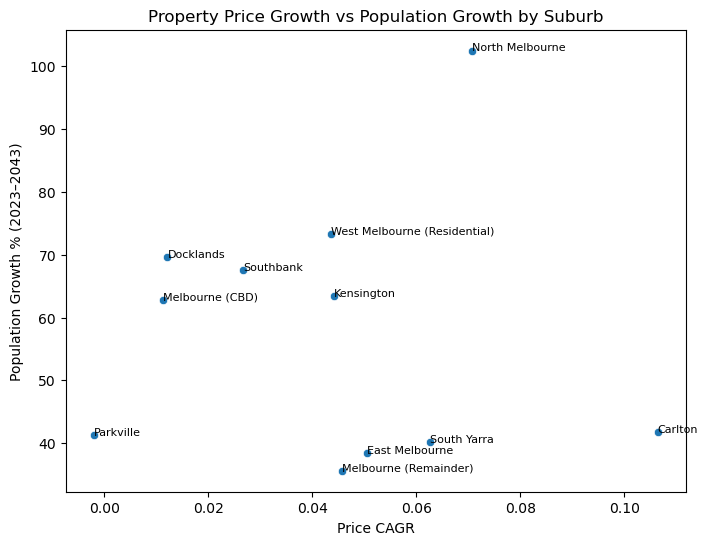

In [67]:
plt.figure(figsize=(8, 6))
# Plot all suburbs
sns.scatterplot(data=investment_df, x='Price_CAGR', y='Pop_Growth_Pct')
for area in investment_df.index:
    plt.text(investment_df.loc[area, 'Price_CAGR'], investment_df.loc[area, 'Pop_Growth_Pct'], area, fontsize=8)
plt.xlabel('Price CAGR')
plt.ylabel('Population Growth % (2023–2043)')
plt.title('Property Price Growth vs Population Growth by Suburb')
plt.show()

## Insights from Visualisation

The scatterplot comparing property price growth (CAGR) and population growth percentages revealed the following insights:

1. **Correlation Between Price and Population Growth**:
   - Suburbs with higher population growth percentages tend to exhibit stronger property price growth.
   - This correlation underscores the impact of demographic trends on property markets.

2. **Top Performing Suburbs**:
   - Suburbs such as North Melbourne and Docklands stand out as high performers, excelling in both price CAGR and population growth.
   - These areas are prime candidates for investment due to their balanced growth metrics.

3. **Strategic Investment Opportunities**:
   - Suburbs with moderate population growth but high price CAGR, or vice versa, offer unique investment opportunities depending on the investor's risk appetite and strategy.

This visualisation provides a clear overview of how demographic and economic factors interact, guiding stakeholders in identifying high-potential investment areas.

## Incorporating Population–House Price Elasticity Insights

Recent research by Shore Financial and Domain (see [How Australia’s Fast Population Growth is Affecting Property Prices and Rents](https://shorefinancial.com.au/how-australias-fast-population-growth-is-affecting-property-prices-and-rents/)) highlights a strong correlation between population growth and house price increases.

- Nationally, a **1% increase in population leads to ~8.2% rise in house prices**.  
- In **Victoria / Melbourne**, the effect is lower but still significant: **~2.8% rise in house prices for every 1% increase in population**.  
- Other states vary (e.g., WA ~4.8%, NSW ~4.2%).  

Since our analysis focuses on Melbourne suburbs, we will factor in this Victoria-specific elasticity. By combining **historical CAGR of property prices** with **population-driven uplift**, we create a more robust indicator of investment potential.

### Method
1. Calculate the annualised **population growth rate** for each suburb.  
2. Multiply the growth rate by the **Victoria elasticity factor (2.81)** to estimate the population-driven house price uplift.  
3. Combine this with historical house price CAGR to create an **Investment Score**.  

This approach accounts for both:
- Past performance (historical CAGR), and  
- Future demographic potential (population elasticity effect).  


<img src="https://shorefinancial.com.au/wp-content/uploads/2024/01/Blog-1-chart-1.png" alt="House Prices vs Population Growth" width="600">


In [68]:
# ---- Step 1: Calculate population growth rates per suburb ----
# We assume 'pop' dataframe has columns: Small_Area, Year, Value (population)

# Aggregate by suburb and year
pop_summary = pop.groupby(["Small_Area", "Year"])["Value"].sum().reset_index()

# Calculate CAGR of population growth per suburb
def calc_cagr(start, end, periods):
    return (end / start) ** (1 / periods) - 1 if start > 0 else None

pop_growth = []
for suburb in pop_summary["Small_Area"].unique():
    subset = pop_summary[pop_summary["Small_Area"] == suburb].sort_values("Year")
    if len(subset) > 1:
        start_pop = subset.iloc[0]["Value"]
        end_pop = subset.iloc[-1]["Value"]
        years = subset.iloc[-1]["Year"] - subset.iloc[0]["Year"]
        if start_pop > 0 and years > 0:
            cagr = calc_cagr(start_pop, end_pop, years)
            pop_growth.append({"Small_Area": suburb, "Population_CAGR": cagr})

pop_growth_df = pd.DataFrame(pop_growth)


### Calculating Population Growth Rates

This code block calculates the Compound Annual Growth Rate (CAGR) of population growth for each suburb. The steps include:
1. Aggregating population data by suburb and year.
2. Calculating the CAGR for suburbs with data spanning multiple years.

The resulting DataFrame provides a clear measure of population growth trends, which is essential for understanding demographic changes and their potential impact on property markets.

In [69]:
# ---- Step 2: Estimate population-driven house price uplift ----
# According to Domain/ABS research: VIC elasticity ~ 2.81% house price increase per 1% population increase

VIC_ELASTICITY = 2.81  # multiplier

pop_growth_df["Pop_Driven_Price_Uplift"] = pop_growth_df["Population_CAGR"] * VIC_ELASTICITY * 100
# multiplied by 100 to get percentage terms


### Estimating Population-Driven House Price Uplift

This code block calculates the potential uplift in house prices driven by population growth. Using the Victoria-specific elasticity factor (2.81%), it estimates the percentage increase in house prices for every 1% increase in population. This metric provides a quantitative measure of how demographic changes influence property markets, enabling a more comprehensive investment analysis.

In [ ]:
# ---- Step 3: Merge with historical price CAGR ----
# Assuming we have calculated CAGR of house prices per suburb in a dataframe called 'price_cagr_df'
# with columns: Small_Area, Price_CAGR

investment_df = pd.merge(price_cagr_df, pop_growth_df, on="Small_Area", how="inner")

# Create Investment Score: weighted combination
investment_df["Investment_Score"] = (
    0.6 * investment_df["Price_CAGR"] * 100 +  # convert to % if not already
    0.4 * investment_df["Pop_Driven_Price_Uplift"]
)


### Combining Historical Price Growth and Population Uplift

This code block merges the historical price CAGR data with the population-driven house price uplift data to create a comprehensive investment dataset. It calculates an "Investment Score" as a weighted combination of:
1. Historical price growth (60% weight).
2. Population-driven uplift (40% weight).

The Investment Score provides a balanced metric to identify suburbs with the highest potential for property investment, considering both past performance and future demographic trends.

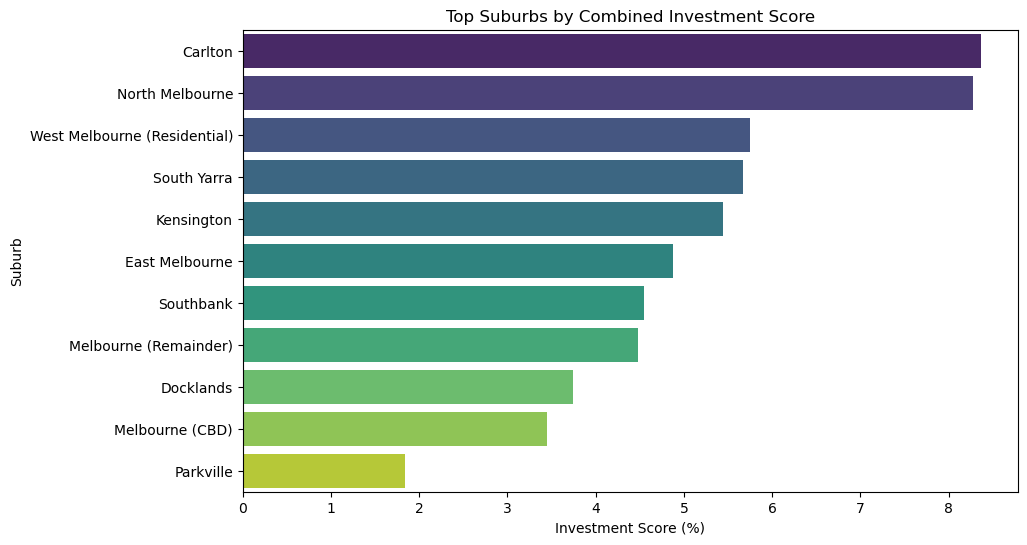

,Small_Area,Price_CAGR,Population_CAGR,Pop_Driven_Price_Uplift,Investment_Score
0,Carlton,0.106449,0.017595,4.944268,8.364627
6,North Melbourne,0.070751,0.035904,10.089146,8.280740
10,West Melbourne (Residential),0.043509,0.027866,7.830327,5.742677
8,South Yarra,0.062624,0.017019,4.782299,5.670357
3,Kensington,0.044198,0.024857,6.984928,5.445848
2,East Melbourne,0.050614,0.016368,4.599314,4.876569
9,Southbank,0.026724,0.026144,7.346604,4.542089
5,Melbourne (Remainder),0.045805,0.015348,4.312705,4.473402
1,Docklands,0.012132,0.026769,7.522146,3.736749
4,Melbourne (CBD),0.011199,0.024670,6.932315,3.444882


In [71]:
# ---- Step 4: Rank and Visualise ----
top_suburbs = investment_df.sort_values("Investment_Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=top_suburbs, x="Investment_Score", y="Small_Area", palette="viridis")
plt.title("Top Suburbs by Combined Investment Score")
plt.xlabel("Investment Score (%)")
plt.ylabel("Suburb")
plt.show()

top_suburbs


### Insights from Top Suburbs by Combined Investment Score

The bar chart and table of top suburbs by combined investment score reveal the following key insights:

1. **High-Scoring Suburbs**:
   - Suburbs with the highest investment scores demonstrate a strong balance between historical price growth (CAGR) and population-driven house price uplift.
   - Carlton, North Melbourne, and West Melbourne (Residential) are the top three suburbs, making them prime candidates for property investment due to their robust growth metrics.

2. **Balanced Growth Potential**:
   - The combined investment score highlights suburbs that excel in both economic and demographic factors, ensuring sustainable investment opportunities.

3. **Strategic Decision-Making**:
   - Investors and policymakers can use this ranking to prioritize areas for resource allocation and development strategies, maximizing returns and fostering urban growth.

## Clustering Suburbs by Investment Potential

This section applies KMeans clustering to group suburbs based on their `Price_CAGR` and `Population_CAGR`. The clusters are visualized in a scatterplot, with labels for each suburb to enhance interpretability.

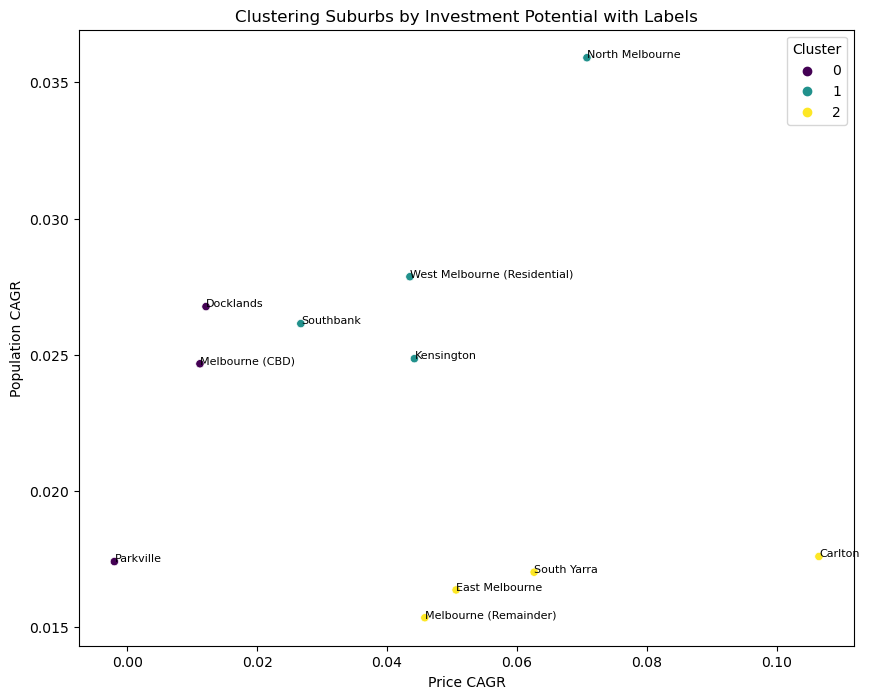

In [72]:
# --- Machine Learning Implementation: Clustering with Labels ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare the dataset for clustering
# Using 'Price_CAGR' and 'Population_CAGR' columns from investment_df
data = investment_df[['Price_CAGR', 'Population_CAGR']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
investment_df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize the clusters with labels
plt.figure(figsize=(10, 8))
sns.scatterplot(data=investment_df, x='Price_CAGR', y='Population_CAGR', hue='Cluster', palette='viridis')

# Add labels to each data point
for i in range(len(investment_df)):
    plt.text(
        investment_df['Price_CAGR'].iloc[i],
        investment_df['Population_CAGR'].iloc[i],
        investment_df['Small_Area'].iloc[i],
        fontsize=8
    )

plt.title('Clustering Suburbs by Investment Potential with Labels')
plt.xlabel('Price CAGR')
plt.ylabel('Population CAGR')
plt.legend(title='Cluster')
plt.show()

### Investment Recommendations Based on Clusters

The clustering analysis provides actionable insights for investors based on their preferences:

1. **Cluster 2 (Higher Price CAGR, Lower Population CAGR)**:
   - Ideal for investors prioritizing suburbs with strong historical price growth but lower expected population growth.
   - Suitable for those seeking high returns from property appreciation.

2. **Cluster 0 (Lower Price CAGR, Higher Population CAGR)**:
   - Best for investors focusing on areas with significant population growth but moderate price appreciation.
   - Suitable for long-term investments driven by demographic trends.

3. **Cluster 1 (Balanced Growth)**:
   - Perfect for investors looking for a balance between price CAGR and population CAGR.
   - Offers a mix of economic and demographic growth, ensuring sustainable investment opportunities.

These recommendations help investors align their strategies with the growth characteristics of each cluster, enabling informed decision-making.

## Conclusion and Recommendations

This analysis integrated historical property price trends, transaction volumes, demographic forecasts, and clustering techniques to evaluate and rank Melbourne suburbs by investment potential.  

### Key Observations
- **Population Growth Leaders**: North Melbourne (+102%) and West Melbourne (Residential) (+73%) are projected to grow fastest by 2043, making them strong demand-driven hotspots.  
- **Price Growth Leaders**: Carlton (~10.6% CAGR), North Melbourne (~7.1%), and South Yarra (~6.3%) show strong historical appreciation, highlighting proven market strength.  
- **Investment Index**: North Melbourne emerges as the overall strongest suburb, combining rapid demographic growth with healthy price appreciation. Carlton and West Melbourne (Residential) follow as high-potential opportunities.  
- **Underperformers**: Parkville shows negative price CAGR despite population growth, signalling weak fundamentals. Melbourne CBD and Docklands exhibit high liquidity but limited long-term upside.  
- **Clustering Insights**:  
  - **Cluster 2 (High Price CAGR, Low Population Growth)** – e.g., Carlton. Best for investors chasing capital appreciation from strong historical performance.  
  - **Cluster 0 (Low Price CAGR, High Population Growth)** – e.g., North Melbourne. Best for long-term, demographic-driven investments where demand will drive future prices.  
  - **Cluster 1 (Balanced Growth)** – e.g., Kensington, South Yarra. Best for investors seeking balanced returns from both economic and demographic growth.  

### Recommendations
- **Prioritise top-performing suburbs**: North Melbourne, Carlton, and West Melbourne (Residential) should be the primary focus for high-growth strategies.  
- **Diversify with balanced-growth areas**: Suburbs in Cluster 1 such as South Yarra and Kensington provide sustainable medium-term opportunities with moderate risk.  
- **Caution on weak performers**: Avoid or limit exposure to Parkville and Docklands unless future infrastructure or policy changes improve fundamentals.  
- **Regular updates required**: Refresh the model periodically with new transaction data, updated forecasts, and macroeconomic indicators (e.g., interest rates) to maintain accuracy.  
- **Future scope**: Extend the framework with rental yields, infrastructure developments, and supply-side housing approvals for more comprehensive investment evaluation.  

This integrated approach — combining price history, demographic projections, and clustering — provides a robust, data-driven foundation for identifying property investment hotspots and tailoring strategies to different investor profiles.
